In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# initial parameters
n = 100 # number of samples
h_k = np.linspace(0, 99, 100)

In [4]:
# define function for FT
# let 'centre' to 'True' to set 0 as center
# data >> 1d array with frequency data from real space
# return 1d-array, frequency + real and imaginary part separately
def fourier_tf(data, centre = False):
    # n >> size of data
    n = len(data)
    
    # gap >> index data of given n-elements array
    # cpt >> repeated calculation for FT
    gap = np.arange(n)
    tmp = gap.reshape((n, 1))
    cal_arr = tmp * gap
    cpt = 2 * np.pi * cal_arr / n

    # calculate FT
    # loop has been used since memory is not enough to store n-n array with data
    R_data = data @ np.cos(cpt)
    I_data = -data @ np.sin(cpt)

    # centre >> If True, shift to set 0 as center. default is False
    div_n = n//2
    result = np.zeros((3, n))
    
    result[1] = R_data
    result[2] = I_data
    
    R_data = np.roll(R_data, div_n)
    I_data = np.roll(I_data, div_n)
        
    gap = (gap - div_n) / n
    
    if centre:
        result[0] = gap
        result[1] = R_data
        result[2] = I_data
    else:
        result[0] = np.roll(gap, div_n)
    
    # return value is 2d array with frequency and FT results
    # return Real and Imaginary part seperately
    return result[0], result[1], result[2]

In [5]:
freq_fin, RS_fin, IS_fin = fourier_tf(h_k, centre=True)
freq_nc, RS_nc, IS_nc = fourier_tf(h_k)

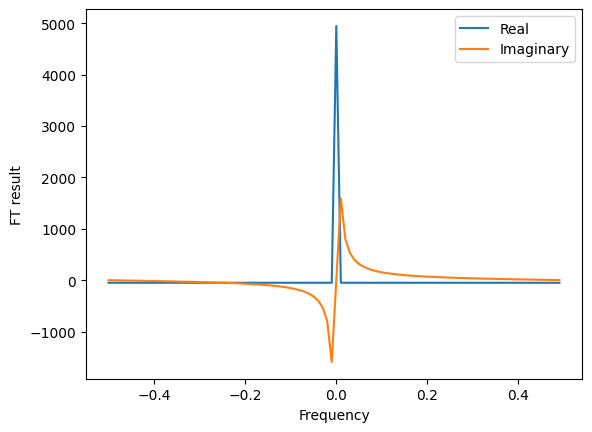

In [6]:
plt.figure()
plt.xlabel('Frequency')
plt.ylabel('FT result')
plt.plot(freq_fin, RS_fin)
plt.plot(freq_fin, IS_fin)
plt.legend(['Real', 'Imaginary'])

In [7]:
PS = np.zeros((2, n))
PS[0] = freq_fin
PS[1] = np.abs(RS_fin + 1j * IS_fin)**2

In [8]:
cmp_PS = PS[1][np.where(PS[0] == 0)]/np.sum(PS[1]) * 100
print(str(cmp_PS) + "%")

[74.62311558]%


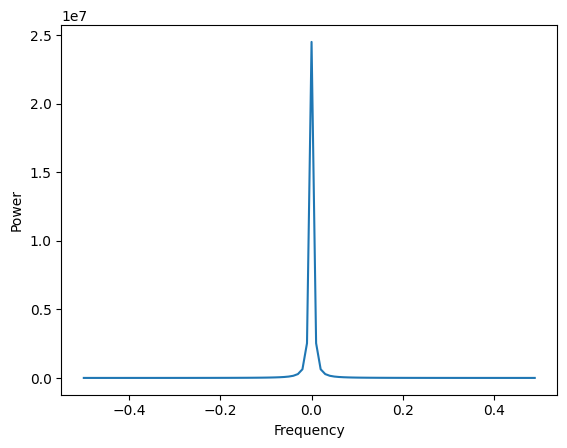

In [20]:
plt.figure()
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.plot(PS[0], PS[1])

In [10]:
# do inverse FT with complex data and size of array n
def inv_tf(data ,n):
    # making array for calculation
    row = np.arange(n)
    col = row.reshape((n, 1))
    arr = row * col
    arr = arr * 2 * np.pi / n
    arr = np.cos(arr) + 1j * np.sin(arr)
    
    result = np.real(arr @ data) / n
    return result

In [11]:
inv_result = np.zeros(n)

cur_data = RS_nc + 1j * IS_nc

inv_result = inv_tf(cur_data, n)

err = np.mean((h_k - inv_result)**2)

MSE is 6.396444083330331e-25


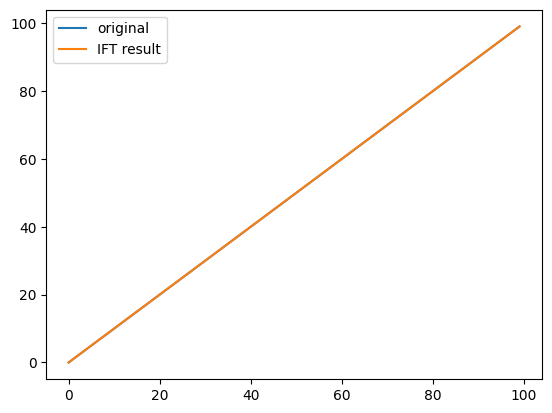

In [12]:
plt.figure()
plt.plot(h_k, h_k, label='original signal')
plt.plot(h_k, inv_result, label='estimated signal')
plt.legend(['original', 'IFT result'])
print("MSE is " + str(err))

In [13]:
var = np.mean(h_k)
var = np.ones(n) * var
mse_list = []

In [16]:
RS_low = np.copy(RS_nc)
IS_low = np.copy(IS_nc)

n_list = ["99", "75", "50" ,"25", "10", "1"]

low_result = np.zeros((6, n))
err_low = np.zeros(6)

for k in range(6):
    RS_low[int(n_list[k]):] = 0
    IS_low[int(n_list[k]):] = 0
    low_result[k] = inv_tf(RS_low + 1j * IS_low, n)
    err_low[k] = np.mean((h_k - low_result[k])**2) ** (0.5)
    mse_list.append(np.mean((var - low_result[k])**2)**(0.5))

RMSE (signal) with 99	: 11.255805366367504
RMSE (signal) with 75	: 14.298857222026992
RMSE (signal) with 50	: 14.439529078193644
RMSE (signal) with 25	: 14.853553326805645
RMSE (signal) with 10	: 15.718661652652102
RMSE (signal) with 1	: 28.86607004772212
------------------------------------------------------
RMSE (mean) with 99	: 453.1705366633543
RMSE (mean) with 75	: 453.1705366633543
RMSE (mean) with 50	: 21.28780253251505
RMSE (mean) with 25	: 14.828285350378838
RMSE (mean) with 10	: 14.430869689661819
RMSE (mean) with 1	: 14.290112590736076


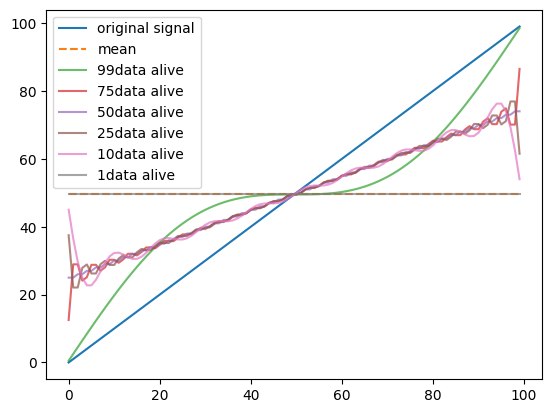

In [18]:
plt.figure()
plt.plot(h_k, h_k, label='original signal')
plt.plot(h_k, var, label='mean', linestyle='--')
for _ in range(6):
    plt.plot(h_k, low_result[_],label=n_list[_] + "data alive", alpha=0.7)
    print("RMSE (signal) with "+ n_list[_] +"\t: " + str(err_low[_]))
plt.legend()
print("------------------------------------------------------")
for _ in range(6):
    print("RMSE (mean) with "+ n_list[_] + "\t: " + str(mse_list[_]))
plt.show()